Patrick Hollenbach, William Halm -
Finance 4931/5931 HW4

In [22]:
# 1. Data Retrieval - Download NVDA daily price data from yahoo finance API
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

NVDA = yf.download("NVDA", start="2015-01-01", end="2025-04-01", interval="1d")

[*********************100%***********************]  1 of 1 completed


In [23]:
# 2. Data Export - Save NVDA daily price data to CSV, save locally
NVDA.to_csv("NVDA.csv")
from google.colab import files
files.download("NVDA.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Questions 3, 4, 5 answered in NVDA.xlsx

6) Forecasting with Prophet - Use Prophet library to forecast NVDA daily price for Jan and Feb 2025

In [30]:
from prophet import Prophet
NVDA = pd.read_csv("NVDA.csv",skiprows = 3)
NVDA.columns = ["ds","y","high","low","open","volume"] #convert for prophet
NVDA['ds'] = pd.to_datetime(NVDA['ds']) # convert datatype for prophet
m = Prophet(daily_seasonality=True)
m.fit(NVDA)
future = m.make_future_dataframe(periods=60)
forecast = m.predict(future)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpx3jgsvtf/ftsbdjpa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx3jgsvtf/car67y5t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47482', 'data', 'file=/tmp/tmpx3jgsvtf/ftsbdjpa.json', 'init=/tmp/tmpx3jgsvtf/car67y5t.json', 'output', 'file=/tmp/tmpx3jgsvtf/prophet_modelyzyl44hy/prophet_model-20250402024518.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:45:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:45:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


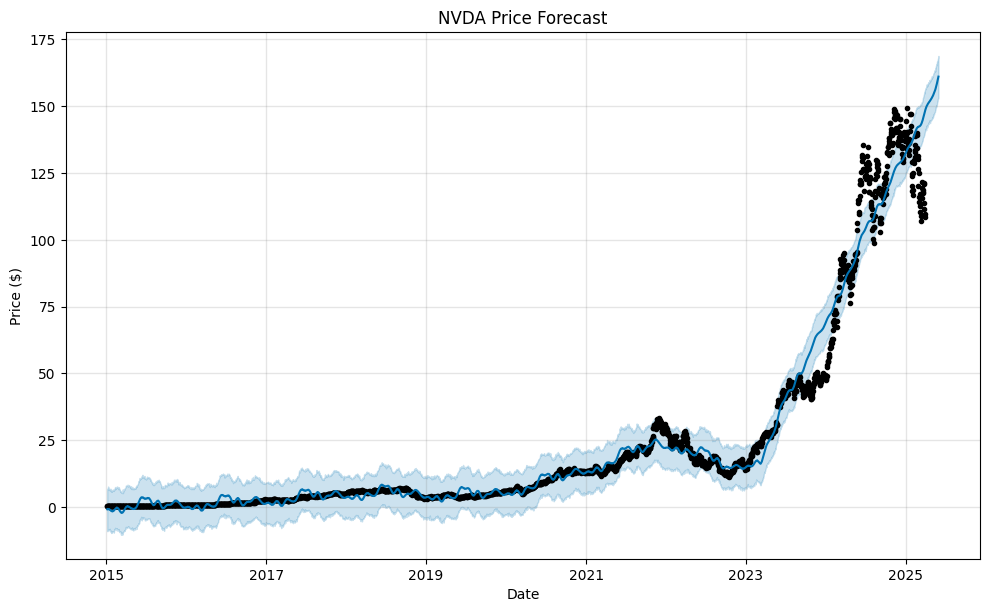

In [31]:
#plot Prophet model -- Forecast Jan - Feb 2025
fig = m.plot(forecast)
plt.title("NVDA Price Forecast")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.show()

In [33]:
#7 Comparison & Residual Analysis
from sklearn.metrics import mean_squared_error

merged = pd.merge(forecast[['ds', 'yhat']], NVDA[['ds', 'y']], on='ds', how='inner') #compare forecast v actual data
jan_feb = merged[(merged['ds'] >= '2025-01-01') & (merged['ds'] <= '2025-02-28')]
mse = mean_squared_error(jan_feb['y'], jan_feb['yhat']) #calculate MSE
print(mse)

116.58989968147552


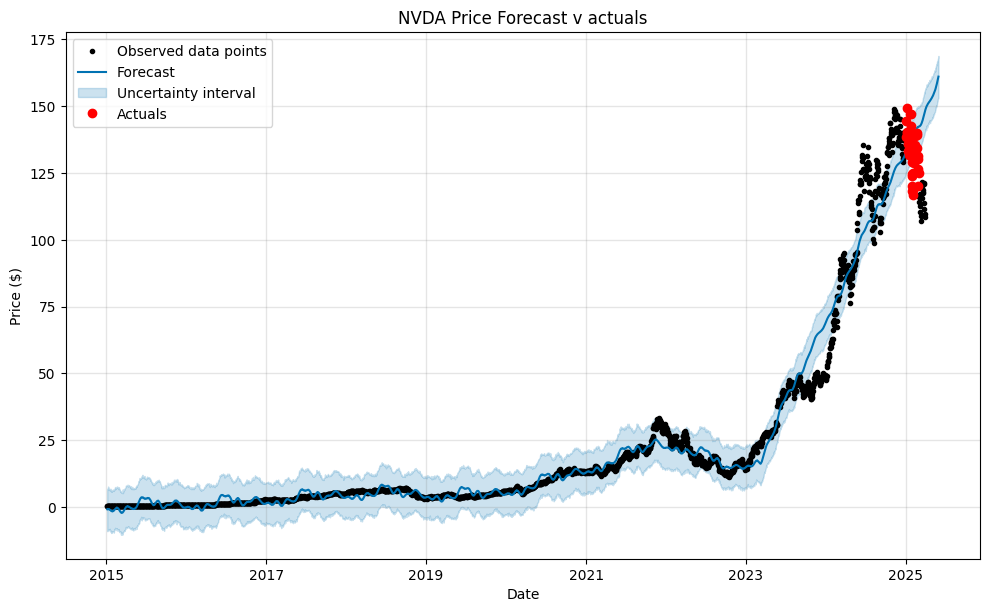

In [34]:
#plot forecast and actuals
fig = m.plot(forecast)
plt.plot(jan_feb['ds'], jan_feb['y'], 'ro', label='Actuals')
plt.title("NVDA Price Forecast v actuals")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.show()

In [36]:
# Residual Analysis
jan_feb['Error'] = jan_feb['y'] - jan_feb['yhat']
jan_feb['Squared_Error'] = jan_feb['Error'] ** 2
error_std = jan_feb['Error'].std() #define standard deviation
jan_feb['Large_Error'] = jan_feb['Error'].abs() > 2 * error_std #find values larger than 2 standard deviation

num_large_errors = jan_feb['Large_Error'].sum() # how many are larger than 2 std
total_points = len(jan_feb)
percent_large = 100 * num_large_errors / total_points #% larger than 2 std

<ipython-input-36-95e0acc140bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jan_feb['Error'] = jan_feb['y'] - jan_feb['yhat']
<ipython-input-36-95e0acc140bb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jan_feb['Squared_Error'] = jan_feb['Error'] ** 2
<ipython-input-36-95e0acc140bb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [37]:
#Final results
print(mse)
print(num_large_errors)
print(percent_large)

116.58989968147552
2
5.128205128205129


The prophet model has an MSE of 116.6 and excel 206.3, neither of which are especially accurate. This is due to market conditions and using a wide data set. The excel model is less accurate because it relies on averaging while prophet uses trend decomposition to identify patterns.